Import libraries

In [105]:
# Import matplotlib for graphs, set inline
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import json

Load torch-rnn checkpoint

In [160]:
input_file = '../data/cv/checkpoint_18700.json'

In [45]:
# load input as json
file_data = open(input_file).read()
checkpoint = json.loads(file_data)

# print stats
it_per_epoch = int(checkpoint['val_loss_history_it'][-1]/checkpoint['opt']['max_epochs'])
print('iteration:         %d' % checkpoint['i'])
# WARNING: this field will only be valid if this is the last checkpoint
print('iterations/epoch   %d'% it_per_epoch)
print('rnn size:          %d' % checkpoint['opt']['rnn_size'])
print('num layers:        %d' % checkpoint['opt']['num_layers'])
print('batch size:        %d' % checkpoint['opt']['batch_size'])
print('sequence length:   %d' % checkpoint['opt']['seq_length'])
print('learning rate:     %f' % checkpoint['opt']['learning_rate'])
print('dropout:           %f' % checkpoint['opt']['dropout'])




iteration:         18700
iterations/epoch   374
rnn size:          128
num layers:        2
batch size:        50
sequence length:   50
learning rate:     0.002000
dropout:           0.000000


Plot Loss

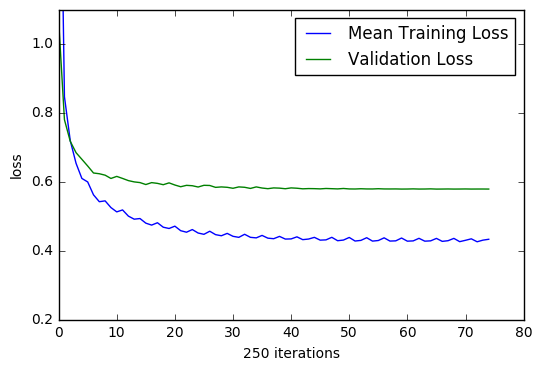

checkpoint 16500 contains the minimum validation loss of 0.578616


In [171]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

# average the training loss every 250 iterations
mean_training_loss = []
for i in range(0, len(checkpoint['train_loss_history']), 250):
    mean_training_loss.append(mean(checkpoint['train_loss_history'][i : i + 250]))

# uncomment for true training loss values
# plt.plot(checkpoint['train_loss_history'][250::250], label="Training Loss")
plt.plot(mean_training_loss, label="Mean Training Loss")
plt.plot(checkpoint['val_loss_history'], label="Validation Loss")

plt.ylim([0.2, 1.1])
plt.ylabel('loss')
plt.xlabel('250 iterations')
plt.legend()
plt.show()

# find the checkpoint with the minimum validation loss
min_index, min_value = min(enumerate(checkpoint['val_loss_history']), key=lambda v: v[1])
print('checkpoint %d contains the minimum validation loss of %f' % (((min_index + 1) * 250), min_value))